In [18]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import logging 
import math
tf.get_logger().setLevel(logging.ERROR)
print(tf.__version__)

2.0.0


In [19]:
dataset,metadata = tfds.load('fashion_mnist',with_info=True,as_supervised=True)
mnist_train,mnist_test = dataset['train'],dataset['test']
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print(num_train_examples,num_test_examples)

60000 10000


In [20]:
class_names=[
    'T-shirt/Top','Trouser','PullOver','Dress','Coat','Sandal','Shirt','Sneaker','Bag','AnkleBoot'
]

In [21]:
def normalise(images,labels):
    images = tf.cast(images,tf.float32)
    images /= 255
    return images,labels
mnist_train = mnist_train.map(normalise)
mnist_test = mnist_test.map(normalise)
mnist_train = mnist_train.cache()
mnist_test = mnist_test.cache()

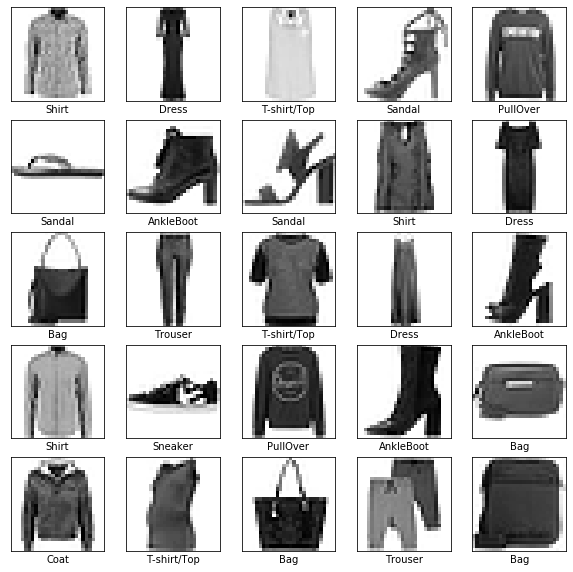

In [22]:
i = 1
plt.figure(figsize=(10,10))
for image,label in mnist_test.take(25):
    image = image.numpy().reshape(28,28)
    plt.subplot(5,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image,cmap = plt.cm.binary)
    plt.xlabel(class_names[label])
    i+=1

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding="same",activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64,(3,3),padding="same",activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [24]:
mnist_train = mnist_train.repeat().shuffle(num_train_examples).batch(32)
mnist_test = mnist_test.batch(32)
model.fit(mnist_train,epochs=5,steps_per_epoch = math.ceil(num_train_examples/32))

1875/1875 [==============================] - 93s 50ms/step - loss: 0.3930 - accuracy: 0.8602
Epoch 2/5
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2620 - accuracy: 0.9042
Epoch 3/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.2128 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1799 - accuracy: 0.9337
Epoch 5/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1549 - accuracy: 0.9426


In [28]:
test_loss,test_accuracy = model.evaluate(mnist_test,steps=math.ceil(num_train_examples/32))

 312/1875 [===>..........................] - ETA: 21s - loss: 0.2487 - accuracy: 0.9113

In [27]:
print(test_accuracy)

0.9113
